## 12장. 군집분석

### 12.1 계층적 군집분석
A쇼핑 고객들의 RFM 통해 몇 개의 군집으로 나누어 질 수 있는지 Python의 계층적 군집분석을 활용하여 확인해 보자. 

#### 데이터 불러오기

실습데이터 Ashopping을 파이썬을 이용하여 불러온다. 

#### 변수명=pd.read_csv("파일경로\파일이름\.파일형식", sep="구분자", encoding='코딩방식')

    구분자: ",",  "|", "\s+"
    encoding:'CP949' 파이썬에서 한글을 열수 있도록 인코딩 설정


In [1]:
# 텍스트 파일 열기
import pandas as pd
df = pd.read_csv("C:\python\Ashopping2.txt",sep=",", encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용_횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
고객ID                1000 non-null int64
이탈여부                1000 non-null int64
총_매출액               1000 non-null int64
방문빈도                1000 non-null int64
1회_평균매출액            1000 non-null int64
할인권_사용_횟수           1000 non-null int64
총_할인_금액             1000 non-null int64
고객등급                1000 non-null int64
구매유형                1000 non-null int64
클레임접수여부             1000 non-null int64
구매_카테고리_수           1000 non-null int64
거주지역                1000 non-null int64
성별                  1000 non-null int64
고객_나이대              1000 non-null int64
거래기간                1000 non-null int64
할인민감여부              1000 non-null int64
멤버쉽_프로그램_가입전_만족도    1000 non-null int64
멤버쉽_프로그램_가입후_만족도    1000 non-null int64
Recency             1000 non-null int64
Frequency           1000 non-null int64
Monetary            1000 non-null int64
상품_만족도              1000 non-null int64
매장_만족도        

#### 500개 무작위 표본추출 

In [2]:
data_temp = df.sample(n=500, random_state=1)
data_temp.shape

(500, 42)

linkage 함수의 옵션 설정은 아래와 같다.

- method(거리측정기준): ward(와드연결법), single(최단연결법), average(평균연결법), complete(최장연결법)
- metric(거리측정방법): euclidean(유클리디언 거리), cityblock(맨해튼 거리) 등

In [4]:
from scipy.cluster.hierarchy import linkage
X = data_temp[["Recency","Frequency","Monetary"]] #데이터 선택
cluster= linkage(X, method = 'average', metric='euclidean') #계층적 군집분석 시행
print(cluster[490:])#군집화일정표 하위 9개 행 출력
#군집화일정표(1~2열: 병합되는 클러스트 번호, 3열:클러스터간 거리, 4열:클러스터 멤버 수)

[[987.         988.           2.5561148  169.        ]
 [902.         990.           2.68540749 175.        ]
 [985.         986.           2.68907337 295.        ]
 [979.         983.           2.86283801  11.        ]
 [191.         971.           2.92080963   3.        ]
 [989.         993.           3.06892186  27.        ]
 [991.         992.           3.46707744 470.        ]
 [994.         995.           3.82932718  30.        ]
 [996.         997.           6.09350305 500.        ]]


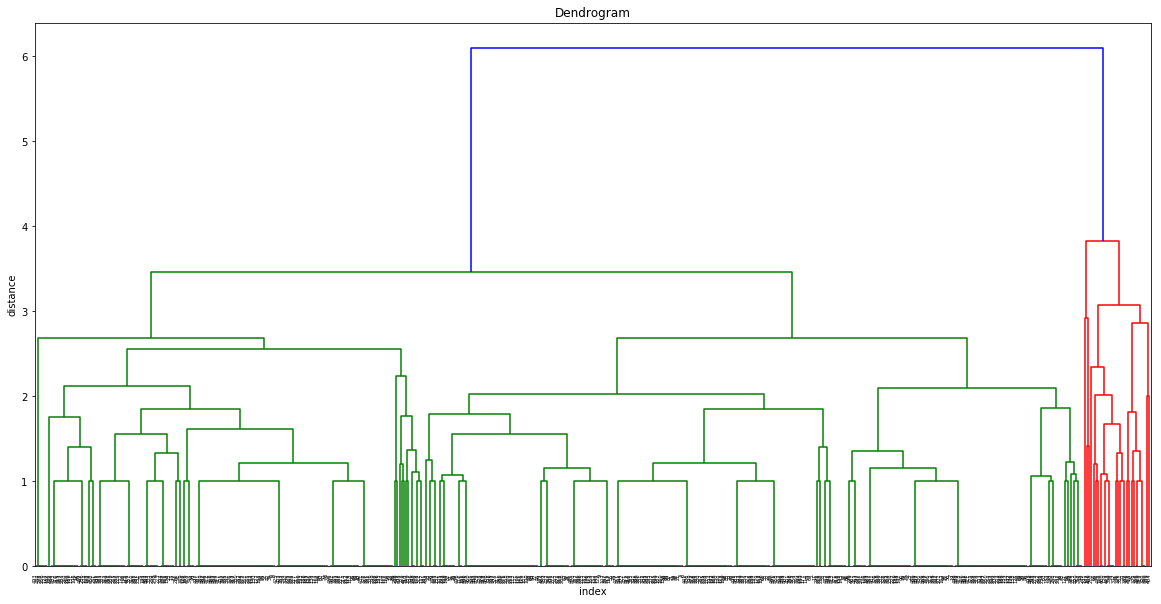

In [6]:
#덴드로그램 그리기
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# 그래프 사이즈
plt.figure(figsize=(20, 10))#그림 크기 설정
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster)
plt.show()

### 12.2 비계층적 군집분석
앞서 계층적 군집분석을 통해 3개의 군집이 나타났다. Python 비계층적 군집분석의 군집 수를 3으로 지정하여 비계층적 군집분석을 실행 해보도록 하자.

In [21]:
from sklearn.cluster import KMeans
X = df[["Recency","Frequency","Monetary"]] #분류 대상 데이터 설정
model = KMeans(n_clusters=3, max_iter=100, random_state=0).fit(X) 
df['cluster_id'] = model.labels_ #군집 번호 입력 
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용_횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3,cluster_id
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,0,0,1,0
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,5,3,6,6,6,0,0,1,2
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,7,7,6,6,7,0,0,1,0
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,5,6,0,0,1,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,5,6,6,5,6,1,0,0,1


In [22]:
df.cluster_id.value_counts()# Frequency (빈도)  #군집의 규모

0    512
1    411
2     77
Name: cluster_id, dtype: int64

In [23]:
#군집 설정
clu1 = df[df.cluster_id==0]
clu2 = df[df.cluster_id==1]
clu3 = df[df.cluster_id==2]

In [24]:
print(clu1.Recency.mean(),clu1.Frequency.mean(),clu1.Monetary.mean())#1번 군집 RMF평균(Recency 평균, Frequency 평균, Monetary 평균)

6.8359375 3.212890625 2.892578125


In [25]:
print(clu2.Recency.mean(),clu2.Frequency.mean(),clu2.Monetary.mean())#2번 군집 RMF평균(Recency 평균, Frequency 평균, Monetary 평균)

6.9391727493917275 4.600973236009732 5.768856447688565


In [26]:
print(clu3.Recency.mean(),clu3.Frequency.mean(),clu3.Monetary.mean())#3번 군집 RMF평균(Recency 평균, Frequency 평균, Monetary 평균)

1.7792207792207793 3.207792207792208 3.7532467532467533
